<a href="https://colab.research.google.com/github/stephenfrein/py_packages_data_analysis/blob/master/python_packages_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful Python Packages for Data Analysis

***

# General Notes on This Session

This is a Jupyter notebook running in Google's Colab environment that we will use to practice with some Python packages that are useful for data analysis.

You can write and execute your Python code right in the browser here. No additional setup is required.

Because of the large number of people here, our interaction during the session will be limited. If you get stuck on something, please do your best for now and I promise to help you out later.

If you get an error with the code I supplied, make sure you have *run all prior code.*

The main packages we will cover today are *pandas* (used for manipulating tabular data) and *matplotlib* / *seaborn* (both used to create graphs).

We could easily spend hours on each of these packages and so can only do a quick tour during our time today.

# Pandas

The pandas library is essential for data analysis in Python. It allows you to maniulate tabular data structures, such as you would find in a relational database or spreadsheet.

The name comes from "panel data" - a term for used for data sets that track multiple variables over time.

Some things we'll do with pandas:
*   Load data
*   Explore/summarize the data
*   Subset the data
*   Group the data




# Load Data

Let's get some data first. We can load data from (and write back to) a variety of formats, including:
*   text files (CSV, fixed-width)
*   JSON
*   HTML
*   MS Excel
*   SQL

...and lots of others as well.

We can also pull data from a filesystem (just give the path) or a URL.

To get things started, we'll load some CSV data about the Titanic from a URL.


In [0]:
# it's conventional to alias pandas as pd once imported
import pandas as pd
url="https://drive.google.com/uc?export=download&id=1uBVSWxr_20BbtBW0ls5dPS5fU_QeHIAt"
# pandas will read this data into a DataFrame, the typical pandas data structure
# df is a common abbreviation used in DataFrame variables 
titanic_df=pd.read_csv(url)

# Explore Our Data

Now that we've loaded our data, let's take a look at it. 

In [2]:
# let's see the first rows - could also do tail()
titanic_df.head(n=10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
# what's the type of each column?
titanic_df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [4]:
# let's see some stats about the values in each column
titanic_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Mauritz Nils Martin Adahl,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [5]:
# let's see the passengers oldest to youngest
titanic_df.sort_values(by='Age', ascending=False)
# try adding .head(n=5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.00,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.00,0,0,7.7750
490,0,1,Mr. Ramon Artagaveytia,male,71.00,0,0,49.5042
95,0,1,Mr. George B Goldschmidt,male,71.00,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.50,0,0,7.7500
...,...,...,...,...,...,...,...,...
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000


#  Subset the Data

Sometimes we only need parts of the data set. We can grab just the rows and columns that we need.

There are many, many ways to do this sort of thing in Pandas. If you need to search or subset a different way, you can surely find a way to do it.

We'll focus on loc[], which uses a loc[ (rows) , (columns) ] format to specify the data to be returned.


In [6]:
# let's find the first-class passengers who were over 60
# this addresses rows only - getting all columns by default
titanic_df.loc[(titanic_df['Pclass']==1) & (titanic_df['Age'] > 60)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,61.9792
63,0,1,Mr. Albert A Stewart,male,64.0,0,0,27.7208
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
169,0,1,Mr. Wyckoff Van der hoef,male,61.0,0,0,33.5000
251,0,1,Mr. William Thomas Stead,male,62.0,0,0,26.5500
273,1,1,Miss. Kornelia Theodosia Andrews,female,63.0,1,0,77.9583
435,0,1,Mr. Mark Fortune,male,64.0,1,4,263.0000
453,0,1,Mr. Francis Davis Millet,male,65.0,0,0,26.5500
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
542,0,1,Mr. Arthur Ernest Nicholson,male,64.0,0,0,26.0000


In [7]:
# see just the names and ages for first 3 rows (note zero-based indexing for start and end)
titanic_df.loc[0:2,['Name','Age']]

,Name,Age
0,Mr. Owen Harris Braund,22.0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0
2,Miss. Laina Heikkinen,26.0


In [8]:
# now name and age for all rows - notice the colon is basically a wildcard here
titanic_df.loc[:,['Name','Age']]

,Name,Age
0,Mr. Owen Harris Braund,22.0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0
2,Miss. Laina Heikkinen,26.0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0
4,Mr. William Henry Allen,35.0
...,...,...
882,Rev. Juozas Montvila,27.0
883,Miss. Margaret Edith Graham,19.0
884,Miss. Catherine Helen Johnston,7.0
885,Mr. Karl Howell Behr,26.0


In [9]:
# let's combine the two approaches - show the passenger class, name, and age
# for surviving passengers over 65
titanic_df.loc[(titanic_df['Survived']==1) & (titanic_df['Age'] > 65), ['Pclass','Name','Age']]

,Pclass,Name,Age
627,1,Mr. Algernon Henry Wilson Barkworth,80.0


In [10]:
# you can save any of these subsets as a new data frame
older_survivors = titanic_df.loc[(titanic_df['Survived']==1) & (titanic_df['Age'] > 65), ['Pclass','Name','Age']]
older_survivors

,Pclass,Name,Age
627,1,Mr. Algernon Henry Wilson Barkworth,80.0


# Exercise #1

Now, you try. You can find a modified set of COVID-19 data from Johns Hopkins at https://drive.google.com/uc?export=download&id=1v2reITVBrhkoSDleHBOStvsjwDh_zAzh. Pull it into a pandas data frame called covid_df and look at the first rows to get a feel for the data. Then, create a new data frame called 'monday_us_confirmed_cases' that is just confirmed cases (case type is 'Confirmed') from the United States (iso2 value of 'US') from Monday (4/27/2020). What are the average population count across all the counties included in the data set? What is the greatest number of cases in any single county? What county is that?

In [11]:
# set up a url and pull the data into a data frame
url="https://drive.google.com/uc?export=download&id=1v2reITVBrhkoSDleHBOStvsjwDh_zAzh"
covid_df=pd.read_csv(url)
# show the first rows 
covid_df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,County_Area,iso2,Lat,Long,Population_Count
0,Deaths,0,0,4/4/2020,US,Virginia,Lexington,US,37.782586,-79.442629,7446.0
1,Deaths,0,0,4/9/2020,US,Montana,Pondera,US,48.227734,-112.225270,5911.0
2,Deaths,0,0,3/2/2020,US,South Dakota,Corson,US,45.708900,-101.197047,4086.0
3,Deaths,0,0,3/16/2020,US,Michigan,St. Clair,US,42.926554,-82.679380,159128.0
4,Confirmed,0,0,3/29/2020,US,Kentucky,Cumberland,US,36.789261,-85.390500,6614.0


In [12]:
# create a data frame for just confirmed cases in the US on 4/26/2020
monday_us_confirmed_cases = covid_df.loc[(covid_df['Case_Type']=='Confirmed') & (covid_df['iso2'] == 'US') & (covid_df['Date'] == '4/27/2020')]
# get summary stats on that data frame - numeric columns only
monday_us_confirmed_cases.describe()

,Cases,Difference,Lat,Long,Population_Count
count,3254.000000,3254.000000,3150.000000,3150.000000,3.150000e+03
mean,303.148125,6.881991,38.459423,-92.298677,1.067795e+05
std,3196.948263,54.512987,5.302131,12.879008,3.629853e+05
min,0.000000,-95.000000,19.601212,-164.035380,8.600000e+01
25%,3.000000,0.000000,34.707310,-98.304539,1.092175e+04
50%,14.000000,0.000000,38.399516,-90.408210,2.588450e+04
75%,69.000000,2.000000,41.793386,-83.452667,6.826950e+04
max,160489.000000,2231.000000,69.314792,-67.628135,1.003911e+07


In [15]:
# which county has that maximum number of cases?
monday_us_confirmed_cases[monday_us_confirmed_cases['Cases']==160489]
#monday_us_confirmed_cases.loc[monday_us_confirmed_cases['Cases'].idxmax()]

Case_Type             Confirmed
Cases                    160489
Difference                 2231
Date                  4/27/2020
Country_Region               US
Province_State         New York
County_Area            New York
iso2                         US
Lat                     40.7673
Long                   -73.9715
Population_Count    8.33682e+06
Name: 131572, dtype: object

# Grouping

Grouping allows us to put our data into categorical buckets and then operate on those buckets. 

In [16]:
# was the tragedy of Titanic shared equally by passengers of all classes?
titanic_df.groupby('Pclass').mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


# Exercise #2

By Monday the 27th, how many COVID cases had been recorded by each of the states with the top 5 highest number of infections?

In [0]:
# # in case you never completed exericse 1 above
#url="https://drive.google.com/uc?export=download&id=1v2reITVBrhkoSDleHBOStvsjwDh_zAzh"
#covid_df=pd.read_csv(url)
#monday_us_confirmed_cases = covid_df.loc[(covid_df['Case_Type']=='Confirmed') & (covid_df['iso2'] == 'US') & (covid_df['Date'] == '4/27/2020')]

In [17]:
# use a group by to get state totals, summing up the records for each state, and sort by decreasing number of cases, limiting to top 5
# don't forget that you can chain calls together
monday_us_confirmed_cases.groupby('Province_State').sum().sort_values(by='Cases', ascending=False).head(n=5)


,Cases,Difference,Lat,Long,Population_Count
Province_State,,,,,
New York,291996,3951,2637.737383,-4679.399365,26161672.0
New Jersey,111188,2150,846.015259,-1567.071444,8882190.0
Massachusetts,56462,1524,630.994149,-1071.277031,6921234.0
Illinois,45883,1980,4064.049006,-9096.189667,12671821.0
California,44966,1408,2194.949775,-7002.258461,39512223.0


Remember the number of cases for the state that has the most - we'll need that to double-check ourselves a bit later.

# Plotting with Matplotlib

The matplotlib package is the most commonly used way to plot data from pandas data frames and probably Python data in general.

It was inspired by and based partly upon a mathematical computing and graphics environment called MATLAB.

In [18]:
# let's create a new data frame from our original COVID data for confirmed cases in just those five states we identified above
# we'll use a new "isin" method to subset that is less cumbersome for this situation
#                              rows-------------------------------------------------------------------------------------------------------------------------------------  columns--------------------------
hard_hit_states = covid_df.loc[covid_df['Province_State'].isin(['New York','New Jersey','Massachusetts','Illinois','California']) & (covid_df['Case_Type']=='Confirmed'), ['Cases','Date','Province_State']]
hard_hit_states.head()

,Cases,Date,Province_State
10,32,4/5/2020,New York
32,0,3/24/2020,Illinois
44,1,3/26/2020,Illinois
53,0,3/10/2020,Illinois
74,5,3/7/2020,California


In [21]:
# we want to plot by date - does pandas know that Date is a date?
hard_hit_states.dtypes

Cases                      int64
Date              datetime64[ns]
Province_State            object
dtype: object

In [0]:
# make it a date - then go back and run line above
hard_hit_states['Date'] =  pd.to_datetime(hard_hit_states['Date'])

In [23]:
# numpy is a library used for various numeric operations - pandas is actually built on it
import numpy as np
# pivot the data frame - each date gets a row, the states become columns, and the sum of the cases become the cell values  
hard_hit_pivot = pd.pivot_table(hard_hit_states, values='Cases', index=['Date'], columns=['Province_State'], aggfunc=np.sum)
hard_hit_pivot.tail()


Province_State,California,Illinois,Massachusetts,New Jersey,New York
Date,,,,,
2020-04-23,39561,36937,46023,100025,263460
2020-04-24,41355,39658,50969,102196,271590
2020-04-25,42368,41777,53348,105498,282143
2020-04-26,43558,43903,54938,109038,288045
2020-04-27,44966,45883,56462,111188,291996


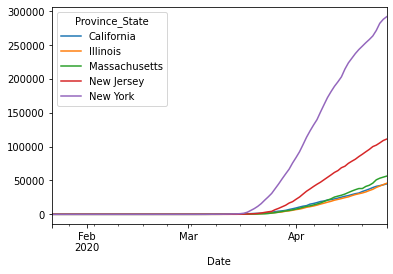

In [24]:
# need this line to create plot inside a Jupyter notebook like this one
%matplotlib inline
# conventional to import as plt
import matplotlib.pyplot as plt
# draw the plot
hard_hit_pivot.plot()

Text(0.5, 1.0, 'COVID-19 Cases in Hardest Hit States')

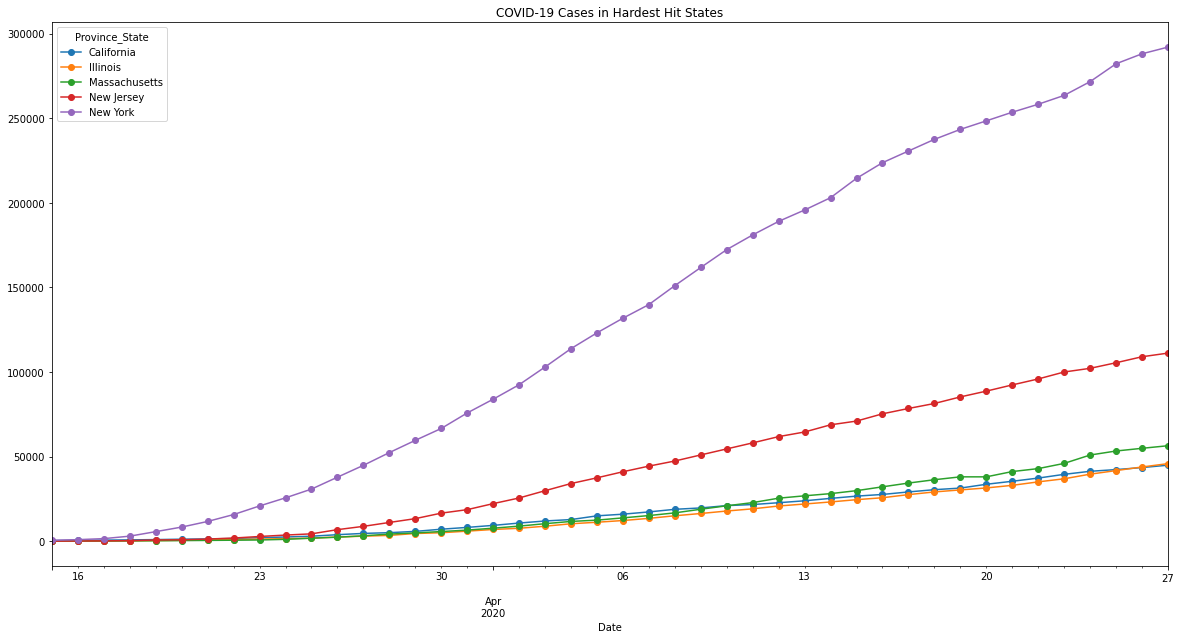

In [25]:
# make plot bigger with width, height in inches
plt.rcParams['figure.figsize'] = [20, 10]
# get a reference to the plot area and add a marker
hard_hit_plot = hard_hit_pivot.plot(marker="o")
# set the x-axis limits 
hard_hit_plot.set_xlim(pd.Timestamp('2020-03-15'), pd.Timestamp('2020-04-27'))
# add a title
hard_hit_plot.set_title("COVID-19 Cases in Hardest Hit States")

#Exercise #3 

Plot the daily growth in cases ("Difference") for each of these states. Create a pivoted version of the difference data called "hard_hit_diffs_pivot" as a parallel to "hard_hit_pivot" from the prior example. This name is important because it will appear in the code later on.

Text(0.5, 1.0, 'COVID-19 New Cases Per Day in Hardest Hit States')

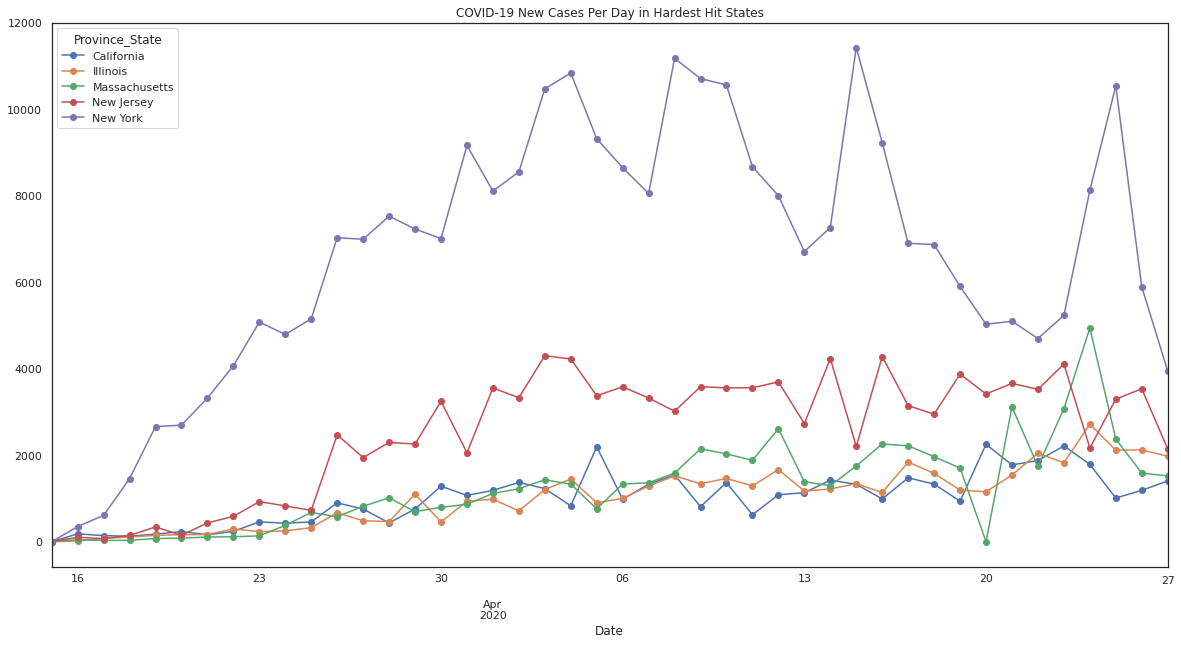

In [38]:
# you can steal most of the code above for the cases plot - you just need to make a handful of key edits
hard_hit_diffs = covid_df.loc[covid_df['Province_State'].isin(['New York','New Jersey','Massachusetts','Illinois','California']) & (covid_df['Case_Type']=='Confirmed'), ['Difference','Date','Province_State']]
hard_hit_diffs['Date'] =  pd.to_datetime(hard_hit_diffs['Date'])
hard_hit_diffs_pivot = pd.pivot_table(hard_hit_diffs, values='Difference', index=['Date'], columns=['Province_State'], aggfunc=np.sum)
hard_hit_diffs_plot = hard_hit_diffs_pivot.plot(marker="o")
hard_hit_diffs_plot.set_xlim(pd.Timestamp('2020-03-15'), pd.Timestamp('2020-04-27'))
hard_hit_diffs_plot.set_title("COVID-19 New Cases Per Day in Hardest Hit States")

# Smoothing Things Out with Resampling

The above day-by-day graph is pretty jagged, making it difficult to see the overall trend in new cases for these states. It would be desirable to smooth out the jitter in the lines above so that we have a clearer picture of the trends.

Luckily, pandas makes it easy to resample time-series data so that we can smooth things out and see a less noisy version.

In [43]:
# # in case you didn't get to complete exercise 3 above, we need to create the hard_hit_diffs_pivot data set
# hard_hit_diffs = covid_df.loc[covid_df['Province_State'].isin(['New York','New Jersey','Massachusetts','Illinois','California']) & (covid_df['Case_Type']=='Confirmed'), ['Difference','Date','Province_State']]
# hard_hit_diffs['Date'] =  pd.to_datetime(hard_hit_diffs['Date'])
# hard_hit_diffs_pivot = pd.pivot_table(hard_hit_diffs, values='Difference', index=['Date'], columns=['Province_State'], aggfunc=np.sum)
# hard_hit_diffs_pivot

Province_State,California,Illinois,Massachusetts,New Jersey,New York
Date,,,,,
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,0
2020-01-24,0,1,0,0,0
2020-01-25,0,0,0,0,0
2020-01-26,2,0,0,0,0
...,...,...,...,...,...
2020-04-23,2217,1830,3079,4111,5238
2020-04-24,1794,2721,4946,2171,8130
2020-04-25,1013,2119,2379,3302,10553


In [48]:
weekly_changes = pd.DataFrame()
weekly_changes['New York'] = hard_hit_diffs_pivot['New York'].resample('W').mean()
weekly_changes['New Jersey'] = hard_hit_diffs_pivot['New Jersey'].resample('W').mean()
weekly_changes['Massachusetts'] = hard_hit_diffs_pivot['Massachusetts'].resample('W').mean()
weekly_changes['Illinois'] = hard_hit_diffs_pivot['Illinois'].resample('W').mean()
weekly_changes['California'] = hard_hit_diffs_pivot['California'].resample('W').mean()
weekly_changes = weekly_changes.truncate(before='2020-01-01', after='2020-04-26')
weekly_changes.tail()

,New York,New Jersey,Massachusetts,Illinois,California
Date,,,,,
2020-03-29,6264.000000,1638.857143,616.428571,506.714286,600.857143
2020-04-05,9073.142857,3445.571429,1077.857143,951.857143,1311.714286
2020-04-12,9410.428571,3477.857143,1853.571429,1370.428571,1108.714286
2020-04-19,7764.142857,3350.142857,1800.285714,1357.857143,1233.714286
2020-04-26,6380.428571,3391.000000,2408.714286,1935.142857,1732.428571


Text(0.5, 1.0, 'COVID-19 New Cases Per Week Smoothed')

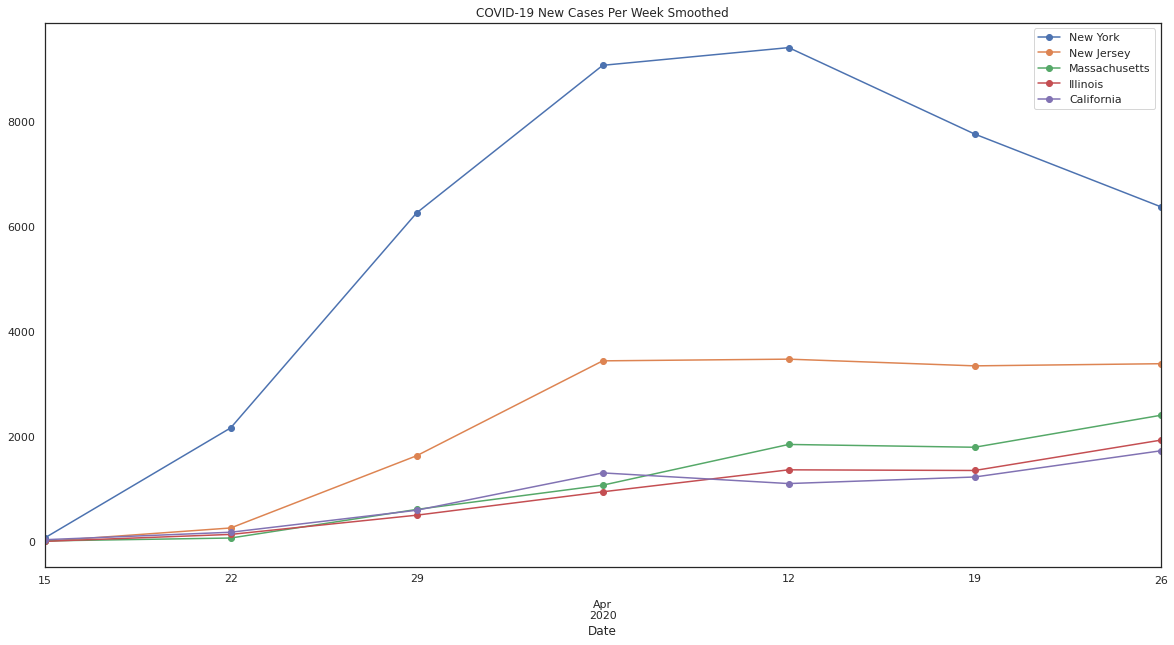

In [49]:
hard_hit_diffs_smooth_plot = weekly_changes.plot(marker="o")
hard_hit_diffs_smooth_plot.set_xlim(pd.Timestamp('2020-03-15'), pd.Timestamp('2020-04-26'))
hard_hit_diffs_smooth_plot.set_title("COVID-19 New Cases Per Week Smoothed")

# Plotting with Seaborn

Seaborn is a data visualization library built on top of matplotlib. It focuses on having a simple interface and attractive defaults. Basically, it tries to expose matplotlib capabilities more easily and make things look nicer out-of-the-box.

The name comes from a character in the TV series "The West Wing." The author of the package just seems to like the show.

(-125.0, -65.0)

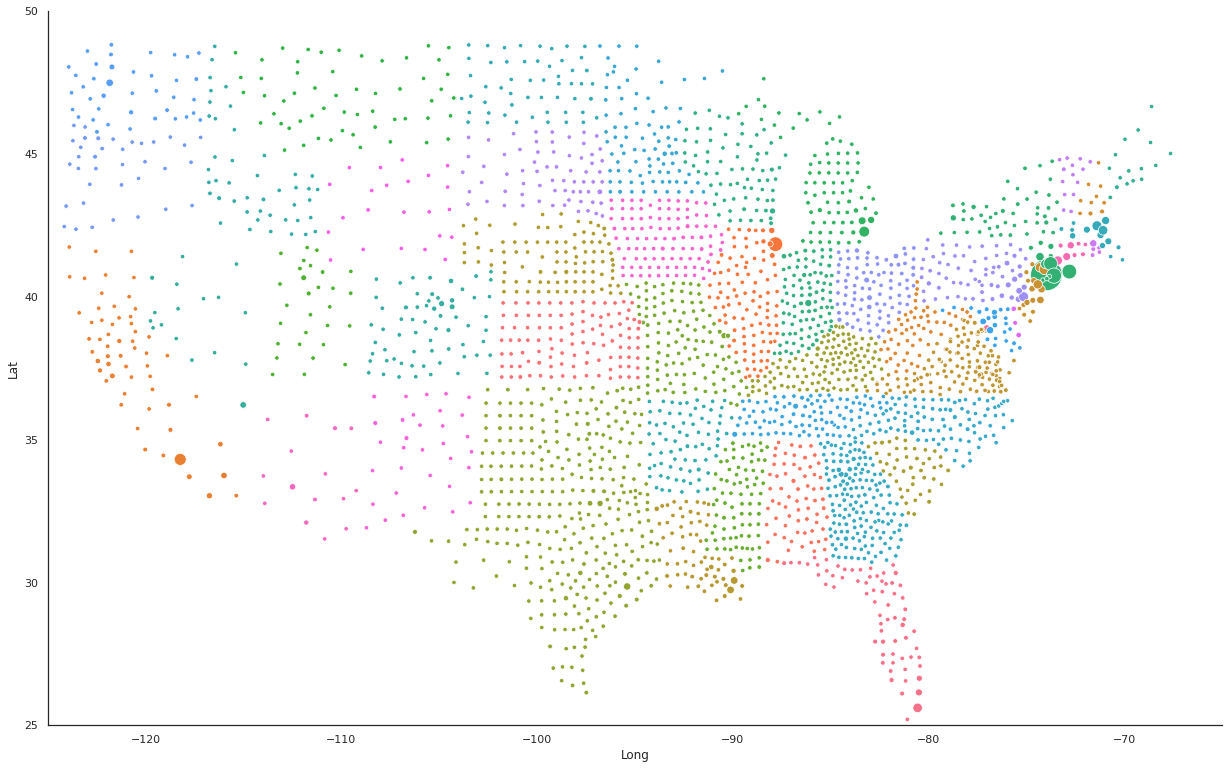

In [36]:
# common to import as sns - the initials of the character from that show
import seaborn as sns
# set default style, color palette, etc.
sns.set(style="white")
# creation relational plot (basically a scatterplot)
# sizes gives a relative scale on which things are drawn
splot = sns.relplot(x="Long", y="Lat", hue="Province_State", size="Cases", 
            sizes=(20,1000), legend=None, data=monday_us_confirmed_cases)
splot.fig.set_size_inches(20, 12)
# focus axes on contiguous US states
plt.ylim(25, 50)
plt.xlim(-125,-65)

# Lastly, Check Out Bokeh

Bokeh is another plotting library that emphasizes interactivity. It allows you do pan/zoom, save graphics to disk, and build other kinds of interactions. Check it out at https://docs.bokeh.org/en/latest/.